# **Introduction**
  **Hey everyone, good morning!**

  **Just in case you're grabbing a coffee, I wanted to let you know we're kicking off this seminar on Linear Discriminant Analysis (LDA) at 10:10 AM.**

  **In a nutshell, LDA is a cool technique used to categorize data into different groups. It's like being a super organizer, looking for patterns in information to effectively sort things out.  Think of it like separating apples from oranges based on their size and color. LDA does something similar, but with much more complex data and multiple features!**

  **We'll be diving deeper into LDA throughout the seminar, so come prepared to unlock the mysteries of data classification!**

<hr>

# **Importing Libraries**

**Classical Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**SKLearn**

In [30]:
from sklearn.metrics import *
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

<hr>

# **Data Loading**

**You can grab the data directly from load_digits(), as the data you are having is in form of dictionary**

In [3]:
digits = load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<hr>

**Let's create a dataframe**

In [6]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)

In [7]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
df["Target"] = digits.target

In [9]:
df["Target"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


<Figure size 640x480 with 0 Axes>

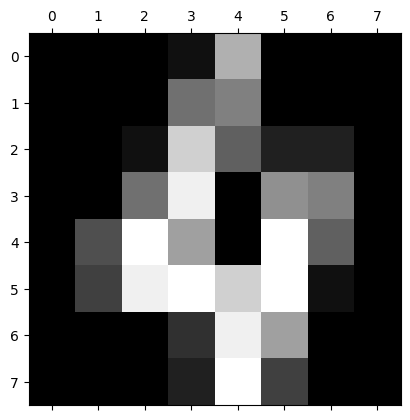

In [11]:
plt.gray()
plt.matshow(digits.data[4].reshape(8, 8))
plt.show()

<hr>

**Let's split this data into features**

In [12]:
# Independent Features
X = digits.data

# Dependent Features
Y = digits.target

In [13]:
# Independent Columns
x_Df = df.drop("Target", axis = 1)

# Dependent
y_Df = df["Target"]

<hr>

**Training and testing data**

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

<hr>

**Standardize the data**

In [15]:
# OBject to the scaled
scaler = StandardScaler()

In [16]:
# We can pass our data
x_train = scaler.fit_transform(x_train)

In [17]:
# Now let change the test data
x_test = scaler.transform(x_test)

<hr>

#**Linear Discriminant Analysis**

  **Inorder to find the number of components required for LDA, we can use a simple formula that is `n-1`**

  **Just assume there are n persons, so how many lines we would need to distinguish between the given n persons**

  **If incase, you are having less number of features as compared to your classes, you need to use `min(no of features, no_of_classes - 1)`**

In [18]:
# if we having 19 classses and there are only 8 features
min(8, 19-1)

8

**In this data, we are having 64 features, and number of classes are 10**
  * **So, in this case we would use (n-1) = 9**

In [19]:
# Object to LDA
LDA = LinearDiscriminantAnalysis(n_components = 9)

In [20]:
x_train = LDA.fit_transform(x_train, y_train)

In [21]:
x_test = LDA.transform(x_test)

<hr>

**LDA Coefficients**

In [22]:
# New shape of x_train
x_train.shape

(1347, 9)

In [24]:
sum(LDA.explained_variance_ratio_)

1.0

<hr>

# **Model Building**

In [27]:
x_train.shape, x_test.shape

((1347, 9), (450, 9))

In [26]:
model = RandomForestClassifier()

In [28]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
pred = model.predict(x_test)

<hr>

**Evaluate**

In [31]:
print(f"Accuracy Score: {accuracy_score(y_test, pred)}")

Accuracy Score: 0.9577777777777777


In [32]:
print(confusion_matrix(y_test, pred))

[[41  0  0  1  1  0  0  0  0  0]
 [ 0 34  1  0  1  0  0  0  1  0]
 [ 0  0 36  2  0  0  0  0  0  0]
 [ 0  0  1 44  0  1  0  0  0  0]
 [ 0  0  0  0 54  0  0  1  0  0]
 [ 0  0  0  1  0 58  0  0  0  0]
 [ 0  0  0  0  1  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  1  0  0 36  0]
 [ 0  0  0  1  1  0  0  0  2 44]]


In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      0.92      0.94        37
           2       0.95      0.95      0.95        38
           3       0.90      0.96      0.93        46
           4       0.93      0.98      0.96        55
           5       0.97      0.98      0.97        59
           6       1.00      0.98      0.99        45
           7       0.98      0.98      0.98        41
           8       0.92      0.95      0.94        38
           9       0.98      0.92      0.95        48

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



<hr>

**`Accuracy: All correct / All values`**

* **Precision: `TP / (TP + TN)`**
* **Recall / Sensitivity: `TP / (TP + FN)`**
* **F1-Score: `(2 * Precision * Recall) / (Precision + Recall)`**
* **Specificity: Opposite of Precision `(TN / TN + FP)`**

<hr>

**Visualize**

In [35]:
import plotly.express as px
fig = px.scatter(df, x = x_train[:,8], y = y_train,
                 labels={
                     "x": "LD1",
                     "y": "LD2",
                 },
                 opacity=1, color = y_train)


fig.update_layout(dict(plot_bgcolor = 'white'))


fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                 showline=True, linewidth=1, linecolor='black')


fig.update_layout(title_text="LDA Scatter Plot")

fig.update_traces(marker=dict(size=3))

fig.show()

<hr>

**Visualization in 3D**

In [37]:
import plotly.express as px
fig = px.scatter_3d(df, x = x_train[:,0], y = y_train, z = x_train[:,1],
                    labels={
                        "x": "LD1",
                        "y": "LD2",
                        "z": "LD3"
                    },
                    opacity=1, color = y_train)

fig.update_layout(scene=dict(xaxis_backgroundcolor="white",
                             yaxis_backgroundcolor="white",
                             zaxis_backgroundcolor="white"))

fig.update_layout(scene=dict(xaxis_showgrid=True, xaxis_gridwidth=1, xaxis_gridcolor='lightgrey',
                             xaxis_zeroline=True, xaxis_zerolinewidth=1, xaxis_zerolinecolor='lightgrey',
                             xaxis_showline=True, xaxis_linewidth=1, xaxis_linecolor='black',
                             yaxis_showgrid=True, yaxis_gridwidth=1, yaxis_gridcolor='lightgrey',
                             yaxis_zeroline=True, yaxis_zerolinewidth=1, yaxis_zerolinecolor='lightgrey',
                             yaxis_showline=True, yaxis_linewidth=1, yaxis_linecolor='black',
                             zaxis_showgrid=True, zaxis_gridwidth=1, zaxis_gridcolor='lightgrey',
                             zaxis_zeroline=True, zaxis_zerolinewidth=1, zaxis_zerolinecolor='lightgrey',
                             zaxis_showline=True, zaxis_linewidth=1, zaxis_linecolor='black'))

fig.update_layout(title_text="3D LDA Scatter Plot")

fig.update_traces(marker=dict(size=3))

fig.show()
